In [ ]:
#-------------------------------------------------------------
# Maestría en Economía Aplicada - UBA
# Taller de Programación
# Docente: Noelia Romero
# Grupo No XX
# Cammisi, Andrés // Porco, Matías // Pineda, David

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [1]:
# -------------------------------------------------------------
# PARTE I: FAMILIARIZANDONOS CON LA EPH
# -------------------------------------------------------------

In [149]:
# ------------------------------------------------------------
# Carga de la base EPH 2005 (Trimestre 1)
# ------------------------------------------------------------

base_2005 = pd.read_stata('Individual_t105.dta', convert_categoricals=False)

print("Dimensiones base 2005:", base_2005.shape)
base_2005.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Individual_t105.dta'

In [7]:
# ------------------------------------------------------------
# Filtrar Región Pampeana
# ------------------------------------------------------------
base_2005 = base_2005[base_2005['region'] == 43].copy()

print("Dimensiones tras filtrar Región Pampeana:", base_2005.shape)


Dimensiones tras filtrar Región Pampeana: (14651, 176)


In [150]:
# ------------------------------------------------------------
# Ajustar nombres de columnas a minúsculas
# ------------------------------------------------------------
base_2005.columns = base_2005.columns.str.lower()

# ------------------------------------------------------------
# Seleccionar variables de interés
# ------------------------------------------------------------
vars_interes = [
    'codusu', 'nro_hogar', 'ch04', 'ch06', 'ch07', 'ch08',
    'nivel_ed', 'estado', 'cat_inac', 'itf', 'ipcf',
    'pondera', 'cat_ocup', 'pp03d', 'pp3e_tot', 
    'pp3f_tot', 'pp04a', 'pp04c', 'pp10a'
]

eph05 = base_2005[vars_interes].copy()

print("Dimensiones del subconjunto:", eph05.shape)
eph05.head()


NameError: name 'base_2005' is not defined

In [10]:
list(eph05.columns)


['codusu',
 'nro_hogar',
 'ch04',
 'ch06',
 'ch07',
 'ch08',
 'nivel_ed',
 'estado',
 'cat_inac',
 'ipcf',
 'pondera',
 'cat_ocup',
 'pp03d',
 'pp3e_tot',
 'pp3f_tot',
 'pp04a',
 'pp04c',
 'pp10a']

In [11]:
print("Dimensiones:", eph05.shape)
eph05.head()


Dimensiones: (14651, 18)


,codusu,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,pondera,cat_ocup,pp03d,pp3e_tot,pp3f_tot,pp04a,pp04c,pp10a
29150,125082,1.00,1.00,28.00,2.00,4.00,2.00,1.00,0.00,280.00,377.00,3.00,0.00,72.00,0.00,2.00,4.00,0.00
29151,125082,1.00,2.00,30.00,2.00,1.00,6.00,1.00,0.00,280.00,377.00,3.00,2.00,30.00,12.00,1.00,6.00,0.00
29152,125082,1.00,1.00,4.00,5.00,1.00,7.00,4.00,5.00,280.00,377.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
29153,125283,1.00,1.00,66.00,2.00,2.00,3.00,1.00,0.00,"1,075.00",283.00,3.00,0.00,0.00,0.00,2.00,2.00,0.00
29154,125283,1.00,2.00,60.00,2.00,2.00,3.00,1.00,0.00,"1,075.00",283.00,3.00,0.00,0.00,0.00,2.00,3.00,0.00


In [12]:
eph05.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14651 entries, 29150 to 43800
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   codusu     14651 non-null  object 
 1   nro_hogar  14651 non-null  float64
 2   ch04       14651 non-null  float64
 3   ch06       14651 non-null  float64
 4   ch07       14651 non-null  float64
 5   ch08       14651 non-null  float64
 6   nivel_ed   14651 non-null  float64
 7   estado     14651 non-null  float64
 8   cat_inac   14651 non-null  float64
 9   ipcf       14651 non-null  float64
 10  pondera    14651 non-null  float64
 11  cat_ocup   14651 non-null  float64
 12  pp03d      14651 non-null  float64
 13  pp3e_tot   14651 non-null  float64
 14  pp3f_tot   14651 non-null  float64
 15  pp04a      14651 non-null  float64
 16  pp04c      14651 non-null  float64
 17  pp10a      14651 non-null  float64
dtypes: float64(17), object(1)
memory usage: 2.1+ MB


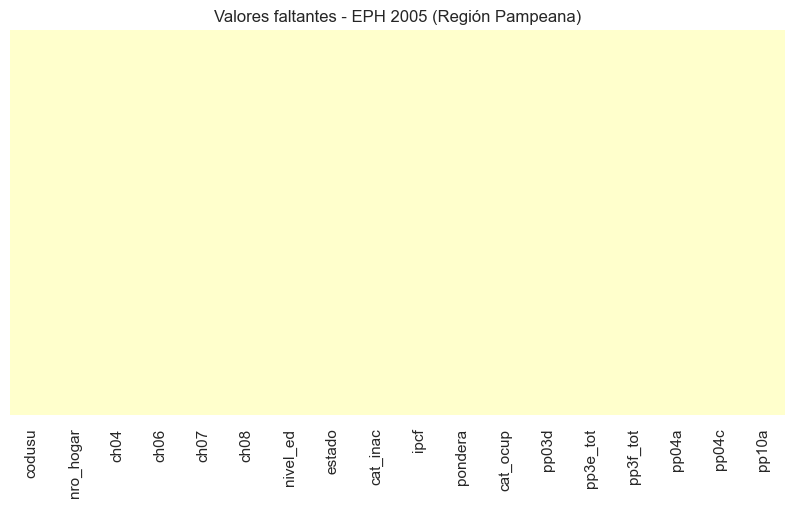

           Faltantes  % del total
codusu             0         0.00
nro_hogar          0         0.00
pp04c              0         0.00
pp04a              0         0.00
pp3f_tot           0         0.00
pp3e_tot           0         0.00
pp03d              0         0.00
cat_ocup           0         0.00
pondera            0         0.00
ipcf               0         0.00
cat_inac           0         0.00
estado             0         0.00
nivel_ed           0         0.00
ch08               0         0.00
ch07               0         0.00
ch06               0         0.00
ch04               0         0.00
pp10a              0         0.00


In [ ]:
# ------------------------------------------------------------
# Diagnóstico visual de valores faltantes - EPH 2005
# ------------------------------------------------------------


plt.figure(figsize=(10,5))
sns.heatmap(eph05.isna(), cbar=False, yticklabels=False, cmap="YlOrRd")
plt.title("Valores faltantes - EPH 2005 (Región Pampeana)")
plt.show()

# Resumen numérico complementario
faltantes = eph05.isna().sum().sort_values(ascending=False)
porcentaje = round((faltantes / len(eph05)) * 100, 2)
print(pd.DataFrame({'Faltantes': faltantes, '% del total': porcentaje}))


In [14]:
# ------------------------------------------------------------
# Copia de la base 2005
# ------------------------------------------------------------
eph05_raw = eph05.copy()


In [15]:
# -------------------------------------------------------------
# Revisión rápida de rangos y valores inusuales previo a la
# limpieza
# -------------------------------------------------------------
def perfil_num(df, cols):
    out = []
    for c in cols:
        s = pd.to_numeric(df[c], errors='coerce')
        out.append({
            "var": c, "n": len(s),
            "n_na": s.isna().sum(),
            "min": s.min(), "p1": s.quantile(0.01),
            "p50": s.quantile(0.50), "p99": s.quantile(0.99),
            "max": s.max(),
            "n_negativos": (s < 0).sum(),
            "n_cero": (s == 0).sum()
        })
    return pd.DataFrame(out).sort_values("var")

num_vars = ["ipcf","pp3e_tot","pp3f_tot","pp03d","ch06","pondera"]
perfil_num(eph05, num_vars)


,var,n,n_na,min,p1,p50,p99,max,n_negativos,n_cero
4,ch06,14651,0,-1.00,-1.00,29.00,84.00,98.00,205,0
0,ipcf,14651,0,0.00,0.00,266.67,"1,800.00","11,300.00",0,170
5,pondera,14651,0,35.00,92.00,341.00,861.00,"2,268.00",0,0
3,pp03d,14651,0,0.00,0.00,0.00,2.00,9.00,0,14217
1,pp3e_tot,14651,0,0.00,0.00,0.00,84.00,999.00,0,9376
2,pp3f_tot,14651,0,0.00,0.00,0.00,20.00,999.00,0,14232


In [ ]:
# ------------------------------------------------------------
# Limpieza final — EPH 2005
# ------------------------------------------------------------

# Copiar base original
eph05_clean = eph05.copy()

# ------------------------------------------------------------
# 1. Edad (CH06): valores negativos → 0
# ------------------------------------------------------------
eph05_clean.loc[eph05_clean["ch06"] < 0, "ch06"] = 0

# ------------------------------------------------------------
# 2. Horas trabajadas (PP03D): filtrar valores absurdos
# ------------------------------------------------------------
eph05_clean.loc[(eph05_clean["pp03d"] < 0) | (eph05_clean["pp03d"] > 120), "pp03d"] = np.nan

# ------------------------------------------------------------
# 3. Ingresos laborales (PP3E_TOT y PP3F_TOT):
#     códigos 9, 99, 999, 9999, 99999 → NaN
# ------------------------------------------------------------
for v in ["pp3e_tot", "pp3f_tot"]:
    # Crear bandera de no respuesta
    eph05_clean[v + "_missing"] = eph05_clean[v].isin([9, 99, 999, 9999, 99999]).astype(int)
    # Reemplazar códigos de no respuesta por NaN
    eph05_clean.loc[eph05_clean[v].isin([9, 99, 999, 9999, 99999]), v] = np.nan
    # Eliminar negativos
    eph05_clean.loc[eph05_clean[v] < 0, v] = np.nan

# ------------------------------------------------------------
# 4. Ingreso per cápita familiar (IPCF): eliminar negativos
# ------------------------------------------------------------
eph05_clean.loc[eph05_clean["ipcf"] < 0, "ipcf"] = np.nan
eph05_clean.loc[eph05_clean["itf"] < 0, "itf"] = np.nan

# ------------------------------------------------------------
# 5. Ponderador (PONDERA): debe ser positivo
# ------------------------------------------------------------
eph05_clean.loc[eph05_clean["pondera"] <= 0, "pondera"] = np.nan

# ------------------------------------------------------------
# 6. Resumen de limpieza
# ------------------------------------------------------------
resumen_limpieza = pd.DataFrame({
    "NAs antes": eph05.isna().sum(),
    "NAs después": eph05_clean.isna().sum(),
    "Nuevos NAs": eph05_clean.isna().sum() - eph05.isna().sum()
})
print("✅ Limpieza completada.\n")
display(resumen_limpieza)


✅ Limpieza completada.



,NAs antes,NAs después,Nuevos NAs
cat_inac,0.00,0,0.00
cat_ocup,0.00,0,0.00
ch04,0.00,0,0.00
ch06,0.00,0,0.00
ch07,0.00,0,0.00
ch08,0.00,0,0.00
codusu,0.00,0,0.00
estado,0.00,0,0.00
ipcf,0.00,0,0.00
nivel_ed,0.00,0,0.00


In [17]:
# ------------------------------------------------------------
# Guardar base limpia EPH - 05
# ------------------------------------------------------------

ruta_salida_2005 = '/Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP1/eph05_clean.csv'

eph05_clean.to_csv(ruta_salida_2005, index=False)
print(f"✅ Base 2005 limpia guardada en:\n{ruta_salida_2005}")


✅ Base 2005 limpia guardada en:
/Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP1/eph05_clean.csv


In [3]:
# ------------------------------------------------------------
# Instalar dependencia para leer archivos .xlsx
# ------------------------------------------------------------
!pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# ------------------------------------------------------------
# Cargar base EPH 2025 (Trimestre 1)
# ------------------------------------------------------------

base_2025 = pd.read_excel('usu_individual_T125.xlsx')

print("Dimensiones base 2025:", base_2025.shape)
base_2025.head()


Dimensiones base 2025: (45425, 235)


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V21_03_M,V22_01_M,V22_02_M,V22_03_M,P_DECCF,P_RDECCF,P_GDECCF,P_PDECCF,P_IDECCF,P_ADECCF
0,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,2,1,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
1,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,3,0,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
2,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,4,0,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
3,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,5,0,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
4,TQRMNOUPQHLOLOCDEFKID00851757,2025,1,1,1,1,43,S,4,1294,...,0,0,0,0,3.0,3.0,3.0,NaN,3.0,3.0


In [6]:
# ------------------------------------------------------------
# Normalizar nombres de columnas a minúsculas
# ------------------------------------------------------------
base_2025.columns = base_2025.columns.str.lower()

print("✅ Nombres de columnas convertidos a minúsculas.")
print(base_2025.columns[:15])  # muestra las primeras 15 para confirmar


✅ Nombres de columnas convertidos a minúsculas.
Index(['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15',
       'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch05',
       'ch06', 'ch07'],
      dtype='object')


In [7]:
# ------------------------------------------------------------
# Filtrar Región Pampeana
# ------------------------------------------------------------
base_2025 = base_2025[base_2025['region'] == 43].copy()

print("Dimensiones tras filtrar Región Pampeana:", base_2025.shape)


Dimensiones tras filtrar Región Pampeana: (13803, 235)


In [66]:
# ------------------------------------------------------------
# Seleccionar variables de interés en base EPH 2025
# ------------------------------------------------------------
vars_interes = [
    'codusu', 'nro_hogar', 'ch04', 'ch06', 'ch07', 'ch08',
    'nivel_ed', 'estado', 'cat_inac', "itf",'ipcf',
    'pondera', 'pondih', 'cat_ocup', 'pp03d', 'pp3e_tot', 
    'pp3f_tot', 'pp04a', 'pp04c', 'pp10a'
]

eph25 = base_2025[vars_interes].copy()

print("Dimensiones del subconjunto:", eph25.shape)
eph25.head()

Dimensiones del subconjunto: (13803, 20)


,codusu,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,itf,ipcf,pondera,pondih,cat_ocup,pp03d,pp3e_tot,pp3f_tot,pp04a,pp04c,pp10a
0,TQRMNOVQVHJOLOCDEFKID00875778,1,2,25,1,4.0,4,1,0,1028000,205600.0,927,1076,3,0.0,24.0,0.0,2.0,3.0,NaN
1,TQRMNOVQVHJOLOCDEFKID00875778,1,2,7,5,4.0,1,4,3,1028000,205600.0,927,1076,0,NaN,NaN,NaN,NaN,NaN,NaN
2,TQRMNOVQVHJOLOCDEFKID00875778,1,1,4,5,4.0,7,4,5,1028000,205600.0,927,1076,0,NaN,NaN,NaN,NaN,NaN,NaN
3,TQRMNOVQVHJOLOCDEFKID00875778,1,1,-1,5,4.0,7,4,5,1028000,205600.0,927,1076,0,NaN,NaN,NaN,NaN,NaN,NaN
4,TQRMNOUPQHLOLOCDEFKID00851757,1,2,29,5,4.0,5,1,0,690000,230000.0,1294,1531,2,0.0,70.0,0.0,2.0,1.0,NaN


In [10]:
list(eph25.columns)

['codusu',
 'nro_hogar',
 'ch04',
 'ch06',
 'ch07',
 'ch08',
 'nivel_ed',
 'estado',
 'cat_inac',
 'ipcf',
 'pondera',
 'pondih',
 'cat_ocup',
 'pp03d',
 'pp3e_tot',
 'pp3f_tot',
 'pp04a',
 'pp04c',
 'pp10a']

In [11]:
print("Dimensiones:", eph25.shape)
eph25.head()

Dimensiones: (13803, 19)


,codusu,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_inac,ipcf,pondera,pondih,cat_ocup,pp03d,pp3e_tot,pp3f_tot,pp04a,pp04c,pp10a
0,TQRMNOVQVHJOLOCDEFKID00875778,1,2,25,1,4.0,4,1,0,205600.0,927,1076,3,0.0,24.0,0.0,2.0,3.0,NaN
1,TQRMNOVQVHJOLOCDEFKID00875778,1,2,7,5,4.0,1,4,3,205600.0,927,1076,0,NaN,NaN,NaN,NaN,NaN,NaN
2,TQRMNOVQVHJOLOCDEFKID00875778,1,1,4,5,4.0,7,4,5,205600.0,927,1076,0,NaN,NaN,NaN,NaN,NaN,NaN
3,TQRMNOVQVHJOLOCDEFKID00875778,1,1,-1,5,4.0,7,4,5,205600.0,927,1076,0,NaN,NaN,NaN,NaN,NaN,NaN
4,TQRMNOUPQHLOLOCDEFKID00851757,1,2,29,5,4.0,5,1,0,230000.0,1294,1531,2,0.0,70.0,0.0,2.0,1.0,NaN


In [12]:
eph25.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13803 entries, 0 to 45424
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   codusu     13803 non-null  object 
 1   nro_hogar  13803 non-null  int64  
 2   ch04       13803 non-null  int64  
 3   ch06       13803 non-null  int64  
 4   ch07       13803 non-null  int64  
 5   ch08       13803 non-null  float64
 6   nivel_ed   13803 non-null  int64  
 7   estado     13803 non-null  int64  
 8   cat_inac   13803 non-null  int64  
 9   ipcf       13803 non-null  float64
 10  pondera    13803 non-null  int64  
 11  pondih     13803 non-null  int64  
 12  cat_ocup   13803 non-null  int64  
 13  pp03d      6004 non-null   float64
 14  pp3e_tot   6004 non-null   float64
 15  pp3f_tot   6004 non-null   float64
 16  pp04a      6004 non-null   float64
 17  pp04c      6004 non-null   float64
 18  pp10a      467 non-null    float64
dtypes: float64(8), int64(10), object(1)
memory usage: 2

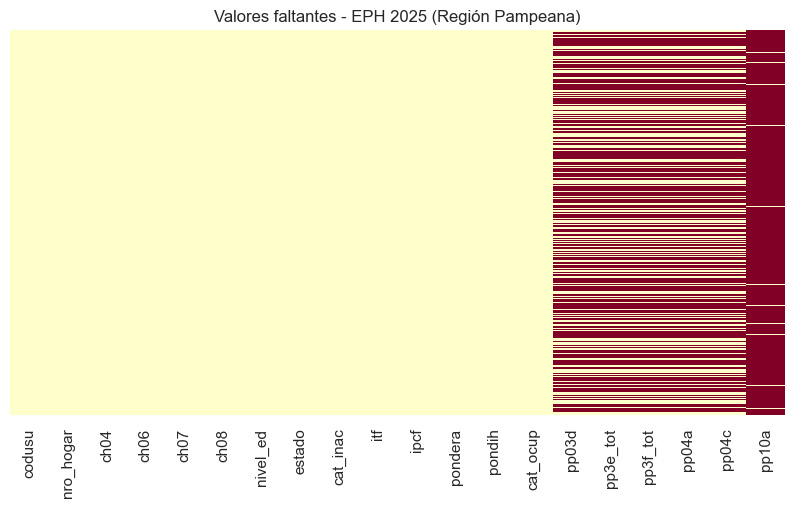

           Faltantes  % del total
pp10a          13336        96.62
pp3f_tot        7799        56.50
pp03d           7799        56.50
pp04c           7799        56.50
pp3e_tot        7799        56.50
pp04a           7799        56.50
nro_hogar          0         0.00
codusu             0         0.00
ch06               0         0.00
ch04               0         0.00
ch07               0         0.00
ch08               0         0.00
pondera            0         0.00
ipcf               0         0.00
itf                0         0.00
cat_inac           0         0.00
estado             0         0.00
nivel_ed           0         0.00
pondih             0         0.00
cat_ocup           0         0.00


In [67]:
# ------------------------------------------------------------
# Diagnóstico visual de valores faltantes - EPH 2025
# ------------------------------------------------------------

plt.figure(figsize=(10,5))
sns.heatmap(eph25.isna(), cbar=False, yticklabels=False, cmap="YlOrRd")
plt.title("Valores faltantes - EPH 2025 (Región Pampeana)")
plt.show()

# Resumen numérico complementario
faltantes = eph25.isna().sum().sort_values(ascending=False)
porcentaje = round((faltantes / len(eph25)) * 100, 2)
print(pd.DataFrame({'Faltantes': faltantes, '% del total': porcentaje}))

In [10]:
# ------------------------------------------------------------
# Copia de la base 2025
# ------------------------------------------------------------
eph25_raw = eph25.copy()

In [68]:
# -------------------------------------------------------------
# Revisión rápida de rangos y valores inusuales previo a la
# limpieza - EPH 2025
# -------------------------------------------------------------
def perfil_num(df, cols):
    out = []
    for c in cols:
        s = pd.to_numeric(df[c], errors='coerce')
        out.append({
            "var": c, "n": len(s),
            "n_na": s.isna().sum(),
            "min": s.min(), "p1": s.quantile(0.01),
            "p50": s.quantile(0.50), "p99": s.quantile(0.99),
            "max": s.max(),
            "n_negativos": (s < 0).sum(),
            "n_cero": (s == 0).sum()
        })
    return pd.DataFrame(out).sort_values("var")

num_vars = ["itf","ipcf","pp3e_tot","pp3f_tot","pp03d","ch06","pondera", "pondih", "pp04a", "pp04c", "pp10a"]
perfil_num(eph25, num_vars)

,var,n,n_na,min,p1,p50,p99,max,n_negativos,n_cero
5,ch06,13803,0,-1.0,1.0,35.0,86.00,102.0,86,0
1,ipcf,13803,0,0.0,0.0,240000.0,2124900.00,8600000.0,0,4463
0,itf,13803,0,0.0,0.0,780000.0,5300000.00,26000000.0,0,4463
6,pondera,13803,0,21.0,74.0,330.0,1662.00,2936.0,0,0
7,pondih,13803,0,0.0,0.0,206.0,2501.76,9295.0,0,4414
4,pp03d,13803,7799,0.0,0.0,0.0,3.00,8.0,0,5420
8,pp04a,13803,7799,1.0,1.0,2.0,3.00,3.0,0,0
9,pp04c,13803,7799,0.0,0.0,6.0,99.00,99.0,0,415
10,pp10a,13803,13336,1.0,1.0,3.0,5.00,5.0,0,0
2,pp3e_tot,13803,7799,0.0,0.0,36.0,84.00,168.0,0,449


In [69]:
# ------------------------------------------------------------
# Limpieza final — EPH 2025
# ------------------------------------------------------------

# Copiar base original
eph25_clean = eph25.copy()

# ------------------------------------------------------------
# 1. Edad (CH06): valores negativos → 0
# ------------------------------------------------------------
eph25_clean.loc[eph25_clean["ch06"] < 0, "ch06"] = 0

# ------------------------------------------------------------
# 2. Horas trabajadas (PP03D): filtrar valores absurdos
# ------------------------------------------------------------
eph25_clean.loc[(eph25_clean["pp03d"] < 0) | (eph25_clean["pp03d"] > 120), "pp03d"] = np.nan

# ------------------------------------------------------------
# 3. Ingresos laborales (PP3E_TOT y PP3F_TOT):
#    códigos 9, 99, 999, 9999, 99999 → NaN; negativos → NaN
# ------------------------------------------------------------
for v in ["pp3e_tot", "pp3f_tot"]:
    # Crear bandera de no respuesta (antes de recodificar)
    eph25_clean[v + "_missing"] = eph25_clean[v].isin([9, 99, 999, 9999, 99999]).astype(int)
    # Reemplazar códigos de no respuesta por NaN
    eph25_clean.loc[eph25_clean[v].isin([9, 99, 999, 9999, 99999]), v] = np.nan
    # Eliminar negativos
    eph25_clean.loc[eph25_clean[v] < 0, v] = np.nan

# ------------------------------------------------------------
# 4. Ingreso per cápita familiar (IPCF): eliminar negativos
# ------------------------------------------------------------
eph25_clean.loc[eph25_clean["ipcf"] < 0, "ipcf"] = np.nan
eph25_clean.loc[eph25_clean["itf"] < 0, "itf"] = np.nan

# ------------------------------------------------------------
# 5. Categoría ocupacional (PP04C): 99 → NaN (No sabe/No responde)
# ------------------------------------------------------------
eph25_clean.loc[eph25_clean["pp04c"] == 99, "pp04c"] = np.nan

# ------------------------------------------------------------
# 6. Ponderadores:
#    PONDERA (general) y PONDIH (ingresos/hogares) deben ser > 0
# ------------------------------------------------------------
eph25_clean.loc[eph25_clean["pondera"] <= 0, "pondera"] = np.nan
eph25_clean.loc[eph25_clean["pondih"]  <= 0, "pondih"]  = np.nan

# ------------------------------------------------------------
# 7. Resumen de limpieza
# ------------------------------------------------------------
resumen_limpieza_25 = pd.DataFrame({
    "NAs antes": eph25.isna().sum(),
    "NAs después": eph25_clean.isna().sum(),
    "Nuevos NAs": eph25_clean.isna().sum() - eph25.isna().sum()
})
print("✅ Limpieza 2025 completada.\n")
display(resumen_limpieza_25)


✅ Limpieza 2025 completada.



,NAs antes,NAs después,Nuevos NAs
cat_inac,0.0,0,0.0
cat_ocup,0.0,0,0.0
ch04,0.0,0,0.0
ch06,0.0,0,0.0
ch07,0.0,0,0.0
ch08,0.0,0,0.0
codusu,0.0,0,0.0
estado,0.0,0,0.0
ipcf,0.0,0,0.0
itf,0.0,0,0.0


In [70]:
# ------------------------------------------------------------
# Guardar base limpia - EPH 2025
# ------------------------------------------------------------
ruta_salida_2025 = 'eph25_clean.csv'

eph25_clean.to_csv(ruta_salida_2025, index=False, encoding='utf-8')
print(f"✅ Base 2025 limpia guardada en:\n{ruta_salida_2025}")

✅ Base 2025 limpia guardada en:
eph25_clean.csv


In [143]:
# ------------------------------------------------------------
# Unión de bases EPH 2005 y EPH 2025
# -----------------------------------------------------------

# ------------------------------------------------------------
# 1. Cargar las bases limpias desde disco
# ------------------------------------------------------------
ruta_2005 = 'eph05_clean.csv'
ruta_2025 = 'eph25_clean.csv'

eph05_clean = pd.read_csv(ruta_2005)
eph25_clean = pd.read_csv(ruta_2025)

# ------------------------------------------------------------
# 2. Agregar una columna de año para identificar origen
# ------------------------------------------------------------
eph05_clean["anio"] = 2005
eph25_clean["anio"] = 2025

# ------------------------------------------------------------
# 3. Unir verticalmente las dos bases
# ------------------------------------------------------------
eph_panel = pd.concat([eph05_clean, eph25_clean], ignore_index=True)

# ------------------------------------------------------------
# 4. Confirmar dimensiones y estructura
# ------------------------------------------------------------
print("✅ Bases unidas correctamente.\n")
print("Dimensiones de la base final:", eph_panel.shape)
print("\nDistribución por año:")
print(eph_panel["anio"].value_counts())

# ------------------------------------------------------------
# 5. Guardar base combinada
# ------------------------------------------------------------
ruta_panel = 'eph_panel_05_25.csv'
eph_panel.to_csv(ruta_panel, index=False, encoding='utf-8')
print(f"\n✅ Base combinada guardada en:\n{ruta_panel}")




✅ Bases unidas correctamente.

Dimensiones de la base final: (28454, 23)

Distribución por año:
anio
2005    14651
2025    13803
Name: count, dtype: int64

✅ Base combinada guardada en:
eph_panel_05_25.csv


## Parte II: Primer Análisis Exploratorio

In [128]:
ruta_panel = 'eph_panel_05_25.csv'
eph_panel = pd.read_csv(ruta_panel)
eph_panel.columns = eph_panel.columns.str.lower()

Composición por sexo (%):
anio   2005  2025
sexo             
Mujer  52.1  51.7
Varón  47.9  48.3 



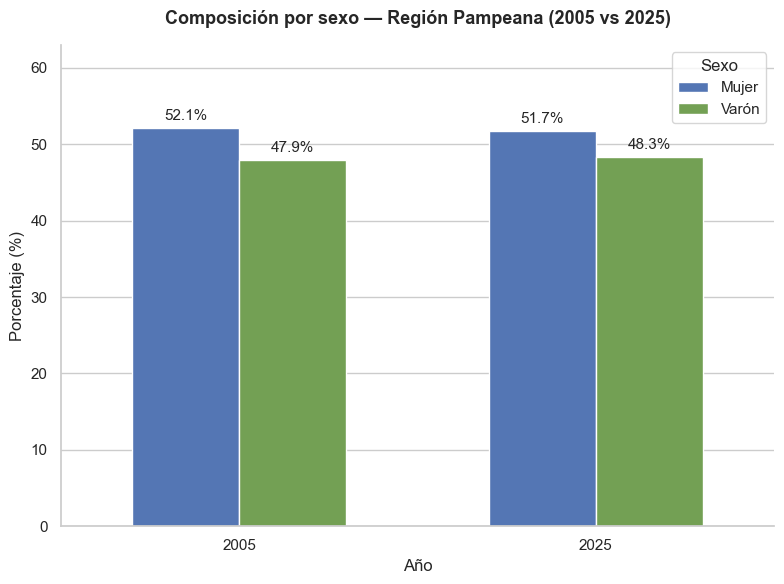

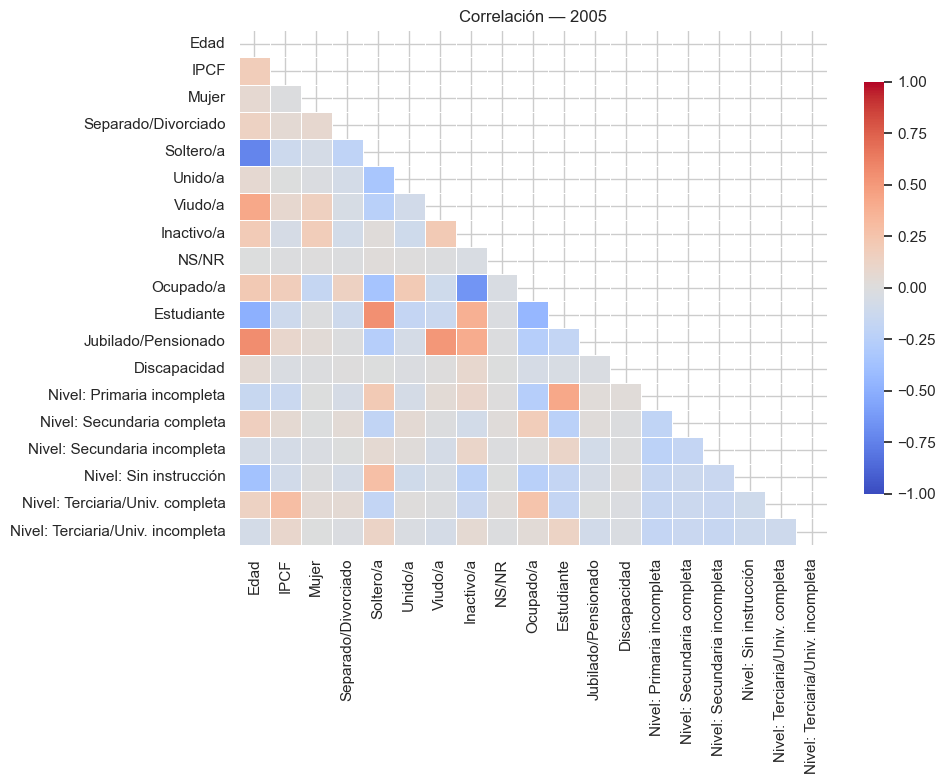

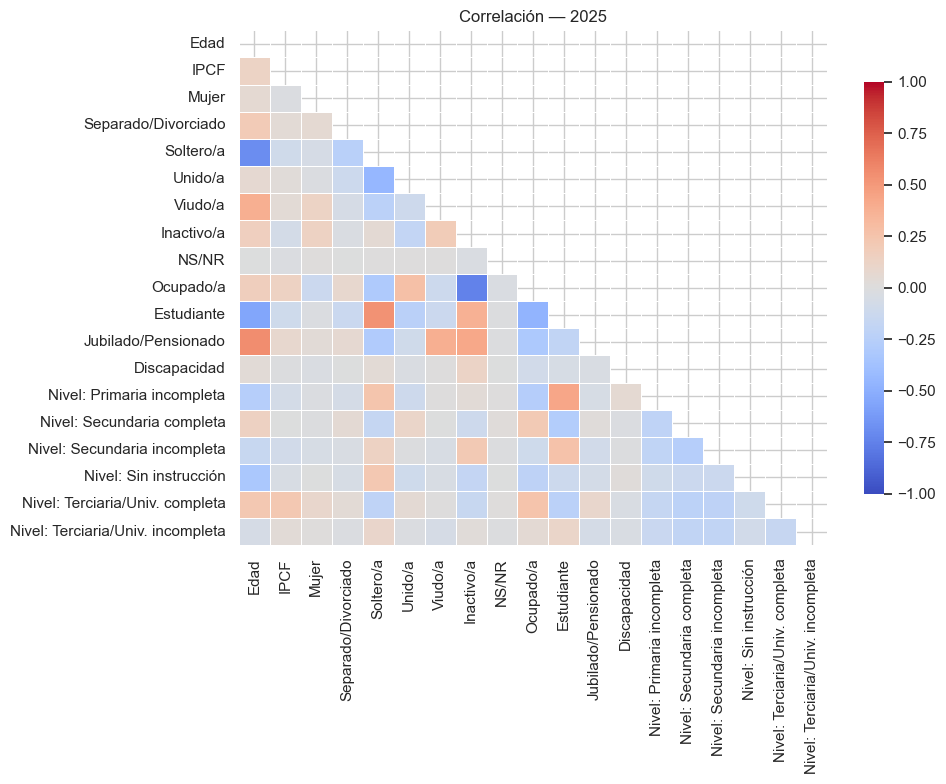

In [155]:
# ------------------------------------------------------------
# 3. Gráfico de barras por sexo
# -----------------------------------------------------------

sns.set_theme(style='whitegrid')

# Map de sexo
sexo_map = {1: 'Varón', 2: 'Mujer'}
eph_panel['sexo'] = eph_panel['ch04'].map(sexo_map)

# Calcular composición ponderada por año y sexo
def comp_sexo_anio(df):
    comp = (df.dropna(subset=['sexo','pondera'])
              .groupby(['anio','sexo'], as_index=False)['pondera']
              .sum()
              .rename(columns={'pondera':'peso'}))
    comp['porc'] = 100 * comp['peso'] / comp.groupby('anio')['peso'].transform('sum')
    return comp[['anio','sexo','porc']]

comp_sexo = comp_sexo_anio(eph_panel)

# Mostramos tabla porcentual
tabla = comp_sexo.pivot(index='sexo', columns='anio', values='porc').round(1)
print('Composición por sexo (%):')
print(tabla, '\n')

# Graficamos
plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=comp_sexo,
    x='anio', y='porc', hue='sexo',
    palette=['#4472C4', '#70AD47'],  # azul y naranja sobrios (estilo INDEC)
    width=0.6
)

# Etiquetas de porcentaje 
for p in ax.patches:
    h = p.get_height()
    if np.isnan(h) or h == 0:
        continue  # evita mostrar 0.0%
    x = p.get_x() + p.get_width()/2
    ax.annotate(f'{h:.1f}%', (x, h),
                ha='center', va='bottom',
                fontsize=11, fontweight='medium',
                xytext=(0, 4), textcoords='offset points')

# Formato
ax.set_title('Composición por sexo — Región Pampeana (2005 vs 2025)',
             fontsize=13, weight='bold', pad=15)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Porcentaje (%)', fontsize=12)
ax.set_ylim(0, np.ceil(comp_sexo['porc'].max()) + 10)
ax.legend(title='Sexo', loc='upper right', frameon=True)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine()

plt.tight_layout()
plt.show()


# ------------------------------------------------------------
# 4. Matriz de correlación (2005 y 2025) 
# ------------------------------------------------------------

# Map cortos/claros
MAP_NIVEL_ED = {
    1:'Primaria incompleta', 2:'Primaria completa',
    3:'Secundaria incompleta', 4:'Secundaria completa',
    5:'Terciaria/Univ. incompleta', 6:'Terciaria/Univ. completa', 7:'Sin instrucción', 9:'NS/NR'
}
MAP_EST_CONY = {1:'Unido/a', 2:'Casado/a', 3:'Separado/Divorciado', 4:'Viudo/a', 5:'Soltero/a'}
MAP_ESTADO   = {0:'NS/NR', 1:'Ocupado/a', 2:'Desocupado/a', 3:'Inactivo/a'}
MAP_INAC     = {1:'Jubilado/Pensionado', 2:'Rentista', 3:'Estudiante', 4:'Ama de Casa',
                5:'Menor', 6:'Discapacidad', 7:'Otro', 9:'NS/NR'}

def preparar_simple(df):
    """
    Devuelve un DF con:
      - Edad (numérica)
      - IPCF (numérica)
      - Dummies minimalistas y con nombre directo:
          Mujer, Casado/a, Ocupado/a, Desocupado/a, Inactivo/a, Estudiante, etc.
      - Dummies de NIVEL_ED con etiquetas claras (drop_first=True para reducir columnas)
    """
    df = df.copy()
    cols = ['ch04','ch06','ch07','nivel_ed','estado','cat_inac','ipcf']
    df = df[[c for c in cols if c in df.columns]]

    out = pd.DataFrame(index=df.index)

    # Numéricas
    out['Edad'] = pd.to_numeric(df.get('ch06'), errors='coerce')
    out['IPCF'] = pd.to_numeric(df.get('ipcf'), errors='coerce')

    # Sexo: “Mujer” (dummy única; base implícita Varón)
    if 'ch04' in df.columns:
        mujer = (pd.to_numeric(df['ch04'], errors='coerce')==2).astype(int)
        out['Mujer'] = mujer

    # Estado conyugal → dummies simples (drop_first=True para que no explote el tamaño)
    if 'ch07' in df.columns:
        ch07_txt = pd.to_numeric(df['ch07'], errors='coerce').map(MAP_EST_CONY)
        d = pd.get_dummies(ch07_txt, dtype=int, drop_first=True)
        out = pd.concat([out, d], axis=1)

    # Condición de actividad (ESTADO) → dummies de las tres categorías fuertes
    if 'estado' in df.columns:
        est_txt = pd.to_numeric(df['estado'], errors='coerce').map(MAP_ESTADO)
        d = pd.get_dummies(est_txt, dtype=int, drop_first=True)  # deja Ocupado/a como base si existe
        out = pd.concat([out, d], axis=1)

    # Categoría de inactividad: solo algunas útiles para no saturar
    if 'cat_inac' in df.columns:
        inac_txt = pd.to_numeric(df['cat_inac'], errors='coerce').map(MAP_INAC)
        d = pd.get_dummies(inac_txt, dtype=int)
        # nos quedamos con columnas relevantes si existen
        cols_keep = [c for c in ['Estudiante','Quehaceres del hogar','Jubilado/Pensionado','Discapacidad'] if c in d.columns]
        if cols_keep:
            out = pd.concat([out, d[cols_keep]], axis=1)

    # NIVEL_ED: etiquetas claras
    if 'nivel_ed' in df.columns:
        niv_txt = pd.to_numeric(df['nivel_ed'], errors='coerce').map(MAP_NIVEL_ED)
        d = pd.get_dummies(niv_txt, dtype=int, drop_first=True)
        # renombrar a algo corto: “Nivel: Secundaria completa”, etc.
        d.columns = [f'Nivel: {c}' for c in d.columns]
        out = pd.concat([out, d], axis=1)

    # Eliminar columnas sin varianza
    const_cols = [c for c in out.columns if out[c].nunique(dropna=True) <= 1]
    out = out.drop(columns=const_cols, errors='ignore')
    return out

def corr_heatmap_anio(panel, anio, titulo):
    X = preparar_simple(panel[panel['anio']==anio])
    corr = X.corr(method='pearson')
    # Heatmap simple y legible (triángulo inferior)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0,
                vmin=-1, vmax=1, linewidths=.4,
                cbar_kws={'shrink': .8})
    plt.title(titulo)
    plt.tight_layout(); plt.show()
    return corr

corr_2005 = corr_heatmap_anio(eph_panel, 2005, 'Correlación — 2005')
corr_2025 = corr_heatmap_anio(eph_panel, 2025, 'Correlación — 2025')

## Parte III: Conociendo a los pobres y no pobres 

In [138]:

# ------------------------------------------------------------
# 5. No responden Actividad e ITF
# ------------------------------------------------------------
# En la EPH, ESTADO = 0 "No sabe / No responde"
no_respondieron_estado = eph_panel[eph_panel['estado'].isin([0])]
cant_no_respondieron_estado = len(no_respondieron_estado)
total_personas = eph_panel.shape[0]
porc_faltantes = round(cant_no_respondieron_estado / total_personas * 100, 2)

print(f"Personas que no respondieron su condición de actividad: {cant_no_respondieron_estado:,}")
print(f"Equivale al {porc_faltantes}% del total de personas en la muestra.\n")

respondieron   = eph_panel[eph_panel['itf'] > 0].copy()
norespondieron = eph_panel[eph_panel['itf'] == 0].copy()

print(f"Registros que respondieron ITF: {respondieron.shape[0]:,}")
print(f"Registros que no respondieron ITF (ITF=0): {norespondieron.shape[0]:,}\n")

respondieron.to_csv('respondieron.csv', index=False)
norespondieron.to_csv('norespondieron.csv', index=False)
print("Archivos guardados: respondieron.csv y norespondieron.csv")

Personas que no respondieron su condición de actividad: 35
Equivale al 0.12% del total de personas en la muestra.

Registros que respondieron ITF: 9,340
Registros que no respondieron ITF (ITF=0): 4,463

Archivos guardados: respondieron.csv y norespondieron.csv


In [ ]:
# ------------------------------------------------------------
# 6. Agregado de Columna adulto_equiv
# ------------------------------------------------------------
tabla_ae = pd.read_excel('tabla_adulto_equiv.xlsx', skiprows=3).dropna()
tabla_ae.columns = tabla_ae.columns.str.lower()

tabla_ae.rename(columns={'edad': 'rango_edad'}, inplace=True)

sexo_map = {1: 'varones', 2: 'mujeres'}
respondieron['sexo_txt'] = respondieron['ch04'].map(sexo_map)

# Asignamos rango de edad según los tramos de la tabla
def categorizar_edad(edad):
    if pd.isna(edad): 
        return np.nan
    e = int(edad)
    if e < 1: return 'menor de 1 año'
    elif e == 1: return '1año'
    elif e == 2: return '2 años'
    elif e == 3: return '3 años'
    elif e == 4: return '4 años'
    elif e == 5: return '5 años'
    elif e == 6: return '6 años'
    elif e == 7: return '7 años'
    elif e == 8: return '8 años'
    elif e == 9: return '9 años'
    elif e == 10: return '10 años'
    elif e == 11: return '11 años'
    elif e == 12: return '12 años'
    elif e == 13: return '13 años'
    elif e == 14: return '14 años'
    elif e == 15: return '15 años'
    elif e == 16: return '16 años'
    elif e == 17: return '17 años'
    elif 18 <= e <= 29: return '18 a 29 años'
    elif 30 <= e <= 45: return '30 a 45 años'
    elif 46 <= e <= 60: return '46 a 60 años'
    elif 61 <= e <= 75: return '61 a 75 años'
    else: return 'más de 75 años'

respondieron['rango_edad'] = respondieron['ch06'].apply(categorizar_edad)

def asignar_adulto_equiv(fila):
    if pd.isna(fila['rango_edad']) or pd.isna(fila['sexo_txt']):
        return np.nan
    valor = tabla_ae.loc[
        tabla_ae['rango_edad'].str.lower() == fila['rango_edad'].lower(),
        fila['sexo_txt']
    ]
    return valor.values[0] if len(valor) > 0 else np.nan

respondieron['adulto_equiv'] = respondieron.apply(asignar_adulto_equiv, axis=1)

print("\nVista previa con adulto_equiv asignado:")
print(respondieron[['ch04', 'ch06', 'rango_edad', 'adulto_equiv']].head(10))


# Sumamos la columna adulto_equiv agrupando por CODUSU y NRO_HOGAR
respondieron['ad_equiv_hogar'] = (respondieron.groupby(['codusu', 'nro_hogar'])['adulto_equiv'].transform('sum'))

print("\nVista previa con adultos equivalentes por hogar:")
print(respondieron[['codusu', 'nro_hogar', 'ch04', 'ch06', 'adulto_equiv', 'ad_equiv_hogar']].head(10))



Vista previa con adulto_equiv asignado:
       ch04  ch06      rango_edad  adulto_equiv
14651   2.0  25.0    18 a 29 años          0.76
14652   2.0   7.0          7 años          0.66
14653   1.0   4.0          4 años          0.55
14654   1.0   0.0  menor de 1 año          0.35
14655   2.0  29.0    18 a 29 años          0.76
14656   2.0  13.0         13 años          0.76
14657   1.0   5.0          5 años          0.60
14658   2.0  39.0    30 a 45 años          0.77
14659   1.0  41.0    30 a 45 años          1.00
14660   2.0   2.0          2 años          0.46

Vista previa con adultos equivalentes por hogar:
                              codusu  nro_hogar  ch04  ch06  adulto_equiv  \
14651  TQRMNOVQVHJOLOCDEFKID00875778        1.0   2.0  25.0          0.76   
14652  TQRMNOVQVHJOLOCDEFKID00875778        1.0   2.0   7.0          0.66   
14653  TQRMNOVQVHJOLOCDEFKID00875778        1.0   1.0   4.0          0.55   
14654  TQRMNOVQVHJOLOCDEFKID00875778        1.0   1.0   0.0          0.35

In [153]:
# ------------------------------------------------------------
# 7. Valor mínimo para no ser pobre
# ------------------------------------------------------------
cbt_2025 = 365_177   # pesos (primer trimestre 2025)
cbt_2005 = 205.07    # pesos (primer trimestre 2005)

respondieron['itf'] = pd.to_numeric(respondieron['itf'], errors='coerce')
respondieron['ad_equiv_hogar'] = pd.to_numeric(respondieron['ad_equiv_hogar'], errors='coerce')

respondieron['ingreso_necesario'] = respondieron.apply(lambda x: x['ad_equiv_hogar'] * (cbt_2025 if x['anio'] == 2025 else cbt_2005),axis=1)

In [152]:
# ------------------------------------------------------------
# 8. Cantidad de Pobres para cada año
# ------------------------------------------------------------
respondieron.columns = respondieron.columns.str.lower()
# Creamos variable binaria de pobreza
respondieron['pobre'] = (respondieron['itf'] < respondieron['ingreso_necesario']).astype(int)

# Resumen por año: cantidad y porcentaje
resumen = (respondieron.groupby('anio').agg(n_pobres=('pobre','sum'),n_total =('pobre','size')).reset_index())
resumen['porcentaje_muestra'] = (resumen['n_pobres'] / resumen['n_total'] * 100).round(2)

print("Pobres identificados por año (no ponderado):")
print(resumen)

Pobres identificados por año (no ponderado):
   anio  n_pobres  n_total  porcentaje_muestra
0  2025      3281     9340               35.13
